$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\mathrm{d}}
$$

# Electrohydroynamic & Electroosmosis

## Extension of the Navier Stoke Equation

An obvious extension of the N.S. Equation that includes electric effects is through an additional body force


$$\rho \fudm{\vb{u}}{t} = -\nabla p  + \eta \nabla^2 \vb{u}+ \rho \vb{g} +\rho_{el}\,\vb{E}\quad .\tag{1}$$

Note that in this Notebook we use the symbol $\eta$ for viscosity and $\mu$ for chemical potentials, see below.

The additional body force applies on the electric charges in the liquid.  Ignoring magnetic fields and radiative (EM waves) effect, the Maxwell Equation for the $E$-field (Farady's induction law) simplifies to 

$$\nabla \times \vb{E}=0$$

Thus the electric field can be derived from a scalar field (Gauss law)

$$\vb{E}=-\nabla\phi\quad .\tag{2}$$

Note that for the electric field we use a minus sign, while for the velocity field we use the plus sign. Electric charges are the sources of the electric field, which is described with the Poisson equation

$$\nabla^2\phi(\vb{r})=-\frac{1}{\eps}\rho_\text{el}(\vb{r})\quad ,\tag{3}$$

where $\eps$ is the permittivity (polarizability) of the medium, $\eps=\eps_r\,\eps_0$.

## Electrophoresis

Consider a spherical particle with charge $Z\,e$ in an electric field $\vb{E}$.

<img src="pics/electrophoresis.png" width=450px>

On the particle acts the electric force

$$\vb{F}_\text{el}=Z\,e\,\vb{E}\tag{4}$$

Due to viscosity ($Re=0$) the objects moves with a constant velocity, thus

$$\vb{F}_\text{tot}=\vb{F}_\text{el}+\vb{F}_\text{drag}=0\quad\rightarrow\quad\vb{u}_\text{ep}=\frac{Z e}{6\pi\eta a}\vb{E}=\mu_\text{ion}\vb{E}$$

Here the velocity is propotional to the electric field (thus the potential) and the constant is name ion mobility $\mu_\text{ion}$. This depends on the size and charge of the object. This simple model of a spherical object agrees very well with measurements and allows to separate ionic substances. 


## Debye layer near charged surfaces

Consider an electrolyte in contact with a solid surface, e.g. microfluidic walls or a macroscopic particle suspended in a microfluidic flow. The surface is charged and the electrolyt ions of opposite charge (the counterions) are attracted to the wall. The co-ions are repelled.

The chemical potential is the energy required to add an ion to a system.  Assuming the valence of the co- and counterions being $\pm Z$ we have a chemical potential of

$$\mu_\pm(\vb{r})=\mu_0+k_B\,T\ln\left(\frac{c_\pm(\vb{r})}{c_0}\right)\pm Z\,e\,\phi(\vb{r})
$$

At thermodynamic equilibrium the chemical potential is contant throughout the system, i.e. $\mu_\pm(\vb{r})\equiv 0$ thus:

$$k_B\,T\nabla\ln\left(\frac{c_\pm(\vb{r})}{c_0}\right)=\mp Z\,e\,\nabla\phi(\vb{r})\quad ,\tag{5}
$$

with the following boundary conditions

$$c_\pm(\infty)=c_0,\quad \phi(\infty)=0,\quad \phi(\text{surf})=\zeta .\tag{6}$$

We can integrate Eq.(5) using the B.C. (6) and obtain

$$c_\pm(\vb{r})=c_0\exp\left[\mp\frac{Z\,e}{k_B\,T}\phi(\vb{r})\right]\quad .\tag{7}$$

The charge density is just the concentration multiplied by the valence, i.e.

$$\rho_\text{el}(\vb{r})=Z\,e\left[ c_+(\vb{r})- c_-(\vb{r})\right]=-2\,Z e\,c_0\,\sinh\left[\frac{Z\,e}{k_B\,T}\,\phi(\vb{r})\right]\tag{8}$$

To find the electric potential we have to solve the Poisson Eq. (3) by inserting the charge distribution $\rho_\text{el}$, namely

$$\nabla^2\,\phi(\vb{r})=-\frac{1}{\eps}\rho_\text{el}(\vb{r})=2\frac{Z e}{\eps}\,\sinh\left[\frac{Z\,e}{k_B\,T}\,\phi(\vb{r})\right]\quad .\tag{9}$$

Equation (9) can be solved only in very simple geometries analytically. One of these solutions is for a planar surface $xy$-plane, and the electrolyte is occupying a half plane $z>0$. Because of symmetry the solution is then only a function of $z$ and is called the Gouy-Chapman solution:

$$
\phi(z)=\frac{4 k_B T}{Z e}\text{arctanh}\left[\tanh \left(\frac{Z e \zeta}{4 k_B T} \right) \exp\left(-\frac{z}{\lambda_D}\right)\right]\tag{10}
$$

where 
$$
\lambda_D\equiv\sqrt{\frac{\eps k_B T}{2 (Z e)^2\,c_0}}\tag{11}
$$

is the so-called Debye length. For water at room temperature this value is

$$\lambda_D \approx \sqrt{\frac{1\,\text{mM}}{Z^2\,c_0}}\cdot 9.6\,\text{nm}\tag{12}$$



In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as widgets


kBT=1.38e-23*293.
Z=1.
e=1.6e-19

def plot_phi(zeta,c0, log):
    l_d=9.6e-9*np.sqrt(1./c0)
    z=np.linspace(0.,100e-9,100)
    phi=4*kBT/Z/e*np.arctanh(np.tanh(Z*e*zeta/(4*kBT))*np.exp(-z/l_d))
    phi_db=zeta*np.exp(-z/l_d)
    plt.plot(z*1e9,phi*1e3,label='Goy-Chapman')
    plt.plot(z*1e9,phi_db*1e3,label='Debye Hueckel');
    
    plt.ylabel(r'$\phi\,$(mV)')
    plt.xlabel(r'$z\,$(nm)')
    plt.plot([l_d*1e9,l_d*1e9],[phi[-1]*1e3,zeta*1e3],'k-.',label=r'$\lambda_D$')
    if log>0:
        plt.yscale('log')
    plt.legend()

interact(plot_phi,\
        zeta = widgets.FloatSlider(min = 0.01, max = 0.1, step = 0.01, value = 0.02,\
                                    description = r"$\zeta\,\text{[V]}$"),
        c0 = widgets.FloatSlider(min = 0.1, max = 10, step = 0.1, value = 1.,\
                                    description = r"$c_0\,\text{[mMol]}$"),
        log =  widgets.IntSlider(min=0, max = 1, step=1, value =0, description = r"lin[0] log[1]")
        );

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMDIsIGRlc2NyaXB0aW9uPXUnJFxcemV0YVxcLFxcdGV4dHtbVl19JCcsIG1heD0wLjEsIG1pbj0wLjAxLCBzdGVwPTDigKY=


<img src="pics/debeye_layer.png" width=600px>


## Debye-Hückel approximation

We can find simpler solutions to the Poisson equation under the approximation that electric energy is much weaker than the thermal energy:

$$Z\,e\zeta \ll k_B T\tag{13}$$

which is only valid for $\zeta \ll 26\,\text{mV}$

Then Eq.(8) can be after Taylor expansion approximated as $\sinh(u) \approx u$ and inserted into into Eq.(9) we obtain a simplified Poisson equation

$$
\nabla^2\phi(\vb{r})=2\frac{(Ze)^2\,c_0}{\eps k_B T}\,\phi(\vb{r})=\frac{1}{\lambda_D^2}\,\phi(\vb{r}).\tag{14}
$$

For our planar problem for $z>0$ and surface potential $\phi(z=0)=\zeta$ we obtain now a simple differential equation

$$\ppad{\phi(z)}{z}=\frac{1}{\lambda^2_D}\phi(z)\tag{15}$$

with the solution for $z>0$

$$\phi(z)=\zeta \,\exp\left[-\frac{z}{\lambda_D}\right]\quad .\tag{16}
$$

With the potential we can calculate through the Poisson Eq. (3) the charge distribution

$$\rho_\text{el}=-\eps \ppad{\phi(z)}{z}=-\frac{\eps \zeta}{\lambda^2_D}\,\exp\left[-\frac{z}{\lambda_D}\right]\tag{17}$$

The concentrations are then found through Eq. (7). Here we make use of smallness of the $\zeta$-Potential that allows to make a Taylor approximation of the exponential function in Eq. (7):

$$c_\pm(z)=c_0\left[1\mp\frac{Z e \zeta}{k_B T}\exp\left(-\frac{z}{\lambda_D}\right)\right] \quad . \tag{18}$$

We clearly see how the co-ions are surpressed at the interface and the counterions are enhanced.

### Solution for a parallel-plate channel

An infinitly long parallel plate channel can also be solved with analytically. The surfaces are located at positions $z=\pm h/2$. The potential again depends only on $z$ and is given by (15) but now with the boundary conditions $\phi(\pm h/2)=\zeta$. As this problem is symmetric with respect to $z=0$, thus we will have instead of the exponential function a $\cosh$-function. The solution reads

$$\phi(z)=\zeta\frac{\cosh\left(z/\lambda_D\right)}{\cosh\left(h/(2 \lambda_D)\right)}\quad .\tag{19}$$

Again the charge distribution can be obtained from the Poisson Equation (3) and is

$$\rho_\text{el}(z)=-\frac{\eps\,\zeta}{\lambda_D^2}\frac{\cosh\left(z/\lambda_D\right)}{\cosh\left(h/(2 \lambda_D)\right)}\quad .\tag{20}$$


With this solution we can start modeling the electro-osmotic. In electro-osmosis a liquid is moving relative to a charged surface by an applied external potential gradient $\nabla\phi_\text{ext}$. In the ideal case two electrodes are located at each end of the channel. Charge seperation at the walls leads to a Debye layer as described by Eqs. (19) and (29).

<img src="pics/electro_osmosis.png" width=550px>

Let us now add a DC potential difference $\Delta V=\Delta \phi_\text{ext}$, thus we have an external electric field of

$$\vb{E}_\text{ext}=-\nabla\phi_\text{ext}\quad . \tag{21}$$

This electric field exters a body force $\rho_\text{el}^\text{eq} \vb{E}_\text{ext}$ on the Debye layer, which begins to move and drags through viscosity the rest of the liquid (neutral bulk) along. If the charge at the electrodes is removed, for example through electrochemical processes, electric current continue and thereby continously drag the fluid. Let us now derive the resulting electro-osmotic velocity field in the liquid.

For this several assumptions go in. First the external potential does not affectt the charge density. Also the $\zeta$-potential is constant along the wall, the electric field is homogeneous, the flow is steady state, and the Debye length $\lambda_D$ is much smaller than the half width of the channel $h/2\gg \lambda_D$. Let us first write the N.S. Eq. (1) in absence of gravity:

$$\rho \fudm{\vb{u}}{t} = -\nabla p_\text{ext}  + \eta \nabla^2 \vb{u} -\rho^\text{eq}_{el}\,\nabla \phi_\text{ext}\quad .\tag{22}$$

Symmetry of this problem dictates the following structure of the fields:

\begin{eqnarray}
\nabla\phi_\text{ext}(\vb{r})&=&-\vb{E}=E\,\vb{e}_x\tag{23a}\\
\nabla p_\text{ext}(\vb{r})&=&0\tag{23b}\\
\vb{u}(\vb{r})&=&u_x(z)\,\vb{e}_x\tag{23c}
\end{eqnarray}

Thus we have only to look at the $x$-component of the steady state N.S. equation:

$$
    0=\eta\,\ppad{u_x(z)}{z}+\left[\eps \ppad{\phi_\text{eq}}{z}\right]\,E\quad .\tag{24}
$$

or rewritten

$$
\ppad{}{z}\left[ u_x(z) + \frac{\eps \, E}{\eta}\phi_\text{eq}(z)\right]\tag{25}
$$

The boundary conditions that the velocity at the walls must vanish $u_x(z=\pm h/2)=0$ dictate a velocity field of

$$u_x(z)=\left[\zeta-\phi_\text{eq}(z)\right]\frac{e\,E}{\eta}\tag{26}\quad .$$

Inserting our above solution (19) the velocity profile is

$$
u_x(z)=\left[1-\frac{\cosh\left(z/\lambda_D\right)}{\cosh\left(h/(2 \lambda_D)\right)}\right]\,u_\text{eo}\quad ,\tag{27}$$

where we have introduced the electro-osmotic velocity maximum

$$u_\text{eo}=\frac{e\,\zeta}{\eta}\,E \tag{28}$$

If we devide this quantity with the electric field we obtain some EO mobility

$$\mu_\text{eo}=\frac{u_\text{eo}}{E}=\frac{\eps\,\zeta}{\nu}
$$

Let's insert some typical values for EO flows with $\zeta=100\,$mV. $\eta=81\eps_0$ and $\eta=0.001\,$Pa s, then we obtain for the EO mobility $\mu_\text{eo}\approx 7\cdot10^{-8}\,$m$^2\,$V$^{-1}$s$^{-1}$. Generating electric fields in in microfluidics of the order of $10^4\,$V/m is easily achievable. Thus we can expects electric $u_\text{eo}\approx 1\,$mm$\,$s$^{-1}$.

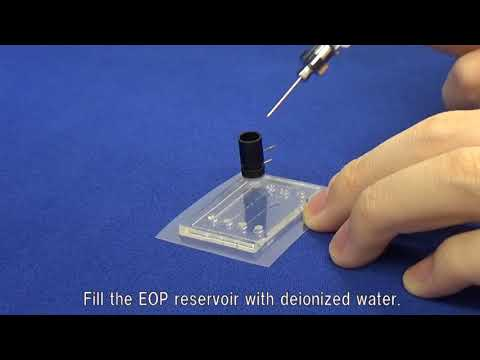

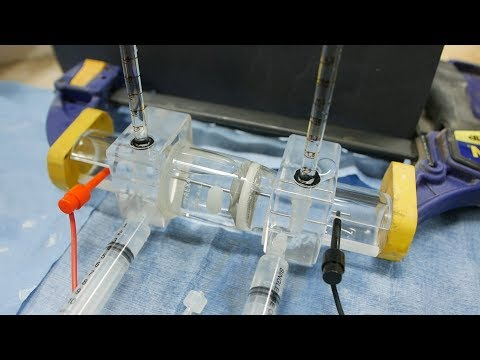

In [7]:
from IPython.display import YouTubeVideo

vid1 = YouTubeVideo("bTJKFN3y80o")
display(vid1)
vid2 = YouTubeVideo("zzVa_tX1OiI")
display(vid2)
